In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
def Activation_ReLU(Z):
    return np.maximum(0, Z)
    
def Activation_Softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def deriv_ReLU(Z):
    return Z > 0

def one_hot_encode(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

In [3]:
class Neural_Net:
    def __init__(self):
        # hidden layer 1
        self.W1 = np.random.rand(64, 784) - 0.5
        self.b1 = np.random.rand(64, 1) - 0.5
        
        # hidden layer 2
        self.W2 = np.random.rand(64, 64) - 0.5
        self.b2 = np.random.rand(64, 1) - 0.5
        
        # output layer
        self.W3 = np.random.rand(10, 64) - 0.5
        self.b3 = np.random.rand(10, 1) - 0.5
    
    def forward_prop(self, X):
        # for hidden layer 1
        self.Z1 = self.W1.dot(X) + self.b1
        self.A1 = Activation_ReLU(self.Z1)
        
        # for hidden layer 2
        self.Z2 = self.W2.dot(self.A1) + self.b2
        self.A2 = Activation_ReLU(self.Z2)
        
        # for output layer
        self.Z3 = self.W3.dot(self.A2) + self.b3
        self.A3 = Activation_Softmax(self.Z3)
        
        
    def backward_prop(self, X, Y):
        # to avoid numerical issues, such as overflow errors, we clip the values between the range 1e-7 to (1 - 1e-7)
        m = Y.size
        self.y_pred = np.clip(self.A3, 1e-7, (1 - 1e-7))
        self.loss = -np.log(np.sum(self.y_pred * Y, axis=1))
        
        y_true = one_hot_encode(Y)
        
        self.dZ3 = (self.y_pred - y_true)
        self.dW3 = (1 / m) * self.dZ3.dot(self.A2.T)
        self.db3 = (1 / m) * self.dZ3
        
        self.dZ2 = self.W3.T.dot(self.dZ3) * deriv_ReLU(self.Z2)
        self.dW2 = (1 / m) * self.dZ2.dot(self.A1.T)
        self.db2 = (1 / m) * self.dZ2
        
        self.dZ1 = self.W2.dot(self.dZ2) * deriv_ReLU(self.Z1)
        self.dW1 = (1 / m) * self.dZ1.dot(X.T)
        self.db1 = (1 / m) * self.dZ1
        
    def update_params(self, alpha):
        self.W1 = self.W1 - alpha * self.dW1
        self.b1 = self.b1 - alpha * self.db1
        self.W2 = self.W2 - alpha * self.dW2
        self.b2 = self.b2 - alpha * self.db2
        self.W3 = self.W3 - alpha * self.dW3
        self.b3 = self.b3 - alpha * self.db3
        
    def get_predictions(self):
        return np.argmax(self.A3, 0)
        
    def get_accuracy(self, predictions, Y):
        return (np.sum(predictions == Y) / Y.size)
        
    def gradient_descent(self, iterations, X, Y, alpha):
        for i in range(iterations):
            self.forward_prop(X)
            self.backward_prop(X, Y)
            self.update_params(alpha)
            self.loss_v_iter = []
            
            if (i % 10 == 0):
                print("Epoch: ", i)
                predictions = self.get_predictions()
                print("Accuracy: ", self.get_accuracy(predictions, Y))
                self.loss_v_iter.append([i, self.loss])
    
    def make_predictions(self, X):
        self.forward_prop(X)
        return self.get_predictions()
    
    def predict(self, X, Y):
        predictions = self.make_predictions(X)
        print("Accuracy: ", self.get_accuracy(predictions, Y))
        print("\n\n")
        
        for i in range(5):
            ind = random.randint(1, len(Y) - 1)
            label = Y[ind]
            current_image = X[:, ind, None]
            prediction = self.make_predictions(X[:, ind, None])
            print("Prediction: ", prediction[0])
            print("Label: ", label)

            current_image = current_image.reshape((28, 28)) * 255
            plt.gray()
            plt.imshow(current_image, interpolation='nearest')
            plt.show()

In [4]:
data = pd.read_csv('data_csv/mnist_train.csv')
n, m = data.shape
data = np.array(data)
print("data.shape = ", data.shape)
data_train = data.T
print("data_train.shape = ", data_train.shape)

data.shape =  (50000, 785)
data_train.shape =  (785, 50000)


In [5]:
Y_train = data_train[0]
X_train = data_train[1:m]
X_train = X_train / 255
print("X_train.shape = ", X_train.shape)
print("Y_train.shape = ", Y_train.shape)

X_train.shape =  (784, 50000)
Y_train.shape =  (50000,)


In [6]:
nn = Neural_Net()
epochs = 300
alpha = 0.10
nn.gradient_descent(epochs, X_train, Y_train, alpha)

Epoch:  0
Accuracy:  0.09045
Epoch:  10
Accuracy:  0.3710333333333333
Epoch:  20
Accuracy:  0.5156166666666666
Epoch:  30
Accuracy:  0.5802166666666667
Epoch:  40
Accuracy:  0.6204666666666667
Epoch:  50
Accuracy:  0.6502666666666667
Epoch:  60
Accuracy:  0.6732166666666667
Epoch:  70
Accuracy:  0.69175
Epoch:  80
Accuracy:  0.7087666666666667
Epoch:  90
Accuracy:  0.7242
Epoch:  100
Accuracy:  0.7376333333333334
Epoch:  110
Accuracy:  0.7499
Epoch:  120
Accuracy:  0.7614666666666666
Epoch:  130
Accuracy:  0.7714833333333333
Epoch:  140
Accuracy:  0.7795666666666666
Epoch:  150
Accuracy:  0.78725
Epoch:  160
Accuracy:  0.7940166666666667
Epoch:  170
Accuracy:  0.8007833333333333
Epoch:  180
Accuracy:  0.8065833333333333
Epoch:  190
Accuracy:  0.81205
Epoch:  200
Accuracy:  0.8168666666666666
Epoch:  210
Accuracy:  0.8210833333333334
Epoch:  220
Accuracy:  0.8253666666666667
Epoch:  230
Accuracy:  0.8290333333333333
Epoch:  240
Accuracy:  0.8329666666666666
Epoch:  250
Accuracy:  0.8363

In [7]:
test_data = pd.read_csv('data_csv/mnist_test.csv')
data_test = np.array(data).T
Y_test = data_test[0]
X_test = data_test[1:m]

print("X_test.shape = ", X_test.shape)
print("Y_test.shape = ", Y_test.shape)
X_test = X_test / 255

X_test.shape =  (784, 10000)
Y_test.shape =  (10000,)


Accuracy:  0.8511



Prediction:  6
Label:  6


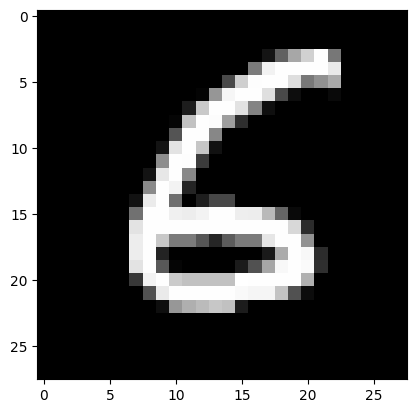

Prediction:  5
Label:  5


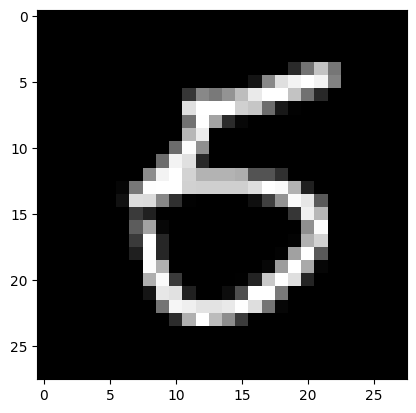

Prediction:  0
Label:  0


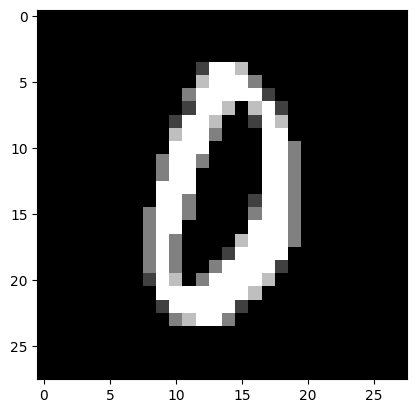

Prediction:  3
Label:  3


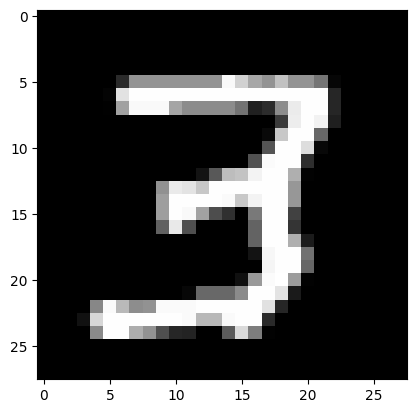

Prediction:  7
Label:  7


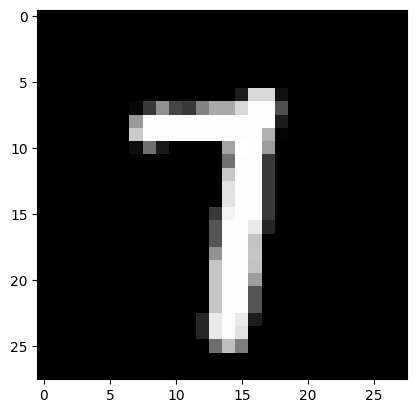

In [8]:
nn.predict(X_test, Y_test)